#  NYC Government Jobs: A Data Exploration

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import shapiro
import datetime as dt
import requests
from sodapy import Socrata
import plotly.express as px

In [2]:
df = pd.read_csv('data/Jobs.csv')

## Understanding Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         6506 non-null   int64  
 1   Agency                         6506 non-null   object 
 2   Posting Type                   6506 non-null   object 
 3   # Of Positions                 6506 non-null   int64  
 4   Business Title                 6506 non-null   object 
 5   Civil Service Title            6506 non-null   object 
 6   Title Classification           6506 non-null   object 
 7   Title Code No                  6506 non-null   object 
 8   Level                          6506 non-null   object 
 9   Job Category                   6506 non-null   object 
 10  Full-Time/Part-Time indicator  6228 non-null   object 
 11  Career Level                   6506 non-null   object 
 12  Salary Range From              6506 non-null   f

In [4]:
df.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,6506.000000,6506.000000,6506.000000,6506.000000,0.0
mean,580600.413311,1.909776,62348.483706,86540.898616,NaN
std,22162.966942,4.755805,30462.429148,44963.602264,NaN
min,468473.000000,1.000000,0.000000,15.000000,NaN
25%,573113.000000,1.000000,51413.000000,62820.000000,NaN
50%,588483.000000,1.000000,60718.000000,83775.000000,NaN
75%,595787.000000,1.000000,76584.000000,109685.000000,NaN
max,604239.000000,98.000000,231796.000000,252165.000000,NaN


In [5]:
df.head(2)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,601401,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Evidence-Based Program Coordinator, Bureau of ...",COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,08/29/2023,27-DEC-2023,08/31/2023,09/12/2023
1,580431,DEPT OF ENVIRONMENT PROTECTION,External,1,Scientist of Water Ecology,SCIENTIST (WATER ECOLOGY),Competitive-1,21538,03,"Public Safety, Inspections, & Enforcement",...,Appointments are subject to OMB approval. For...,Click Apply Now button.,Hours/Shift: 35 hours per week/day (Non-trade ...,"96-05 Horace Harding Expressway, 2nd floor, Co...",NaN,New York City residency is generally required ...,04/08/2023,NaN,04/08/2023,09/12/2023


## Cleaning Data

##### Drop Duplicates

In [6]:
# This function shows total number of duplicate records

df.duplicated().sum()

80

In [7]:
# This function shows the actual duplicate record

df.loc[df.duplicated()]

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
9,577220,DEPT OF PARKS & RECREATION,Internal,10,Associate Park Service Worker,ASSOCIATE PARK SERVICE WORKER,Competitive-1,81106,00,Building Operations & Maintenance,...,Note: Salary will increase beginning of summer...,Parks Employees:\t 1) From a Parks computer: A...,NaN,Staten Island,NaN,"Residency in New York City, Nassau, Orange, Ro...",03/03/2023,NaN,03/15/2023,09/12/2023
14,558439,LAW DEPARTMENT,Internal,1,Paralegal - Special Federal Litigation,PARALEGAL AIDE,Competitive-1,30080,02,Legal Affairs,...,"Due to the current, active Paralegal Aide Civi...",Please click on the 'Apply Now' button.,This is a full-time position consisting of 35 ...,"100 Church Street, New York, N.Y.",NaN,New York City residency is generally required ...,11/02/2022,NaN,11/02/2022,09/12/2023
55,580269,DEPT OF PARKS & RECREATION,Internal,6,Forester,FORESTER,Competitive-1,81361,02,Constituent Services & Community Programs Buil...,...,NOTE: All resumes must be received no later th...,Parks Employees: 1) From a Parks computer: Acc...,NaN,TBD,NaN,New York City Residency is not required for th...,03/24/2023,NaN,04/07/2023,09/12/2023
116,520533,LAW DEPARTMENT,Internal,1,Data entry clerk,CLERICAL ASSOCIATE,Competitive-1,10251,03,"Finance, Accounting, & Procurement",...,Additional Information NOTE: This position is ...,Please click on the Apply Now button,NaN,NaN,NaN,New York City residency is generally required ...,02/17/2022,NaN,03/03/2022,09/12/2023
292,577186,DEPT OF PARKS & RECREATION,Internal,10,Associate Park Service Worker,ASSOCIATE PARK SERVICE WORKER,Competitive-1,81106,00,Building Operations & Maintenance,...,Note: Salary will increase beginning of summer...,Parks Employees:\t 1) From a Parks computer: A...,NaN,Queens,NaN,"Residency in New York City, Nassau, Orange, Ro...",03/03/2023,NaN,03/15/2023,09/12/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,603588,DEPT OF PARKS & RECREATION,Internal,1,Deputy Director of Forestry,ADMINISTRATIVE HORTICULTURIST,Competitive-1,1007C,00,Building Operations & Maintenance,...,NOTE: All resumes must be received no later th...,All Applicants: Go to cityjobs.nyc.gov and s...,NaN,Manhattan,NaN,"Residency in New York City, Nassau, Orange, Ro...",09/08/2023,22-SEP-2023,09/07/2023,09/12/2023
5861,563390,LAW DEPARTMENT,Internal,1,PARALEGAL AIDE - TORT,PARALEGAL AIDE,Competitive-1,30080,02,Legal Affairs,...,Candidates MUST be permanent in the civil serv...,Please click on the âApply Nowâ button.,This is a full time position consisting of 35 ...,The assigned location may be in any of the fiv...,NaN,New York City residency is generally required ...,12/02/2022,NaN,03/16/2023,09/12/2023
6018,521823,LAW DEPARTMENT,Internal,1,Office Assistant,CLERICAL ASSOCIATE,Competitive-1,10251,03,Communications & Intergovernmental Affairs,...,NOTE: This position is open to qualified perso...,To apply click on Apply Now button.,NaN,NaN,NaN,New York City residency is generally required ...,02/25/2022,NaN,02/25/2022,09/12/2023
6355,578607,LAW DEPARTMENT,Internal,1,Social Media Paralegal - Library,PARALEGAL AIDE,Competitive-1,30080,02,Legal Affairs,...,"Due to the current, active Paralegal Aide Civi...","To apply, press APPLY NOW button",This is a full-time position consisting of 35 ...,"100 Church St., N.Y.",NaN,New York City residency is generally required ...,03/14/2023,NaN,03/14/2023,09/12/2023


In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(6426, 30)

##### Drop Columns

In [11]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [12]:
jobs = df.drop(columns = [ 'Title Code No','Title Classification', 'Level',
       'Work Location',  'Work Location 1','Recruitment Contact', 'Residency Requirement', 
    'Division/Work Unit','To Apply','Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'])

In [13]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6426 entries, 0 to 6505
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         6426 non-null   int64  
 1   Agency                         6426 non-null   object 
 2   Posting Type                   6426 non-null   object 
 3   # Of Positions                 6426 non-null   int64  
 4   Business Title                 6426 non-null   object 
 5   Civil Service Title            6426 non-null   object 
 6   Job Category                   6426 non-null   object 
 7   Full-Time/Part-Time indicator  6151 non-null   object 
 8   Career Level                   6426 non-null   object 
 9   Salary Range From              6426 non-null   float64
 10  Salary Range To                6426 non-null   float64
 11  Salary Frequency               6426 non-null   object 
 12  Job Description                6426 non-null   o

##### Replace Values

In [14]:
# Replacing the 0.0 values in the 'Salary Range From' column with the values from the 'Salary Range To' column.
jobs.loc[jobs['Salary Range From'] == 0.0, 'Salary Range From'] = jobs['Salary Range To']


##### Create Column

In [15]:
# Created column 'Avg Salary Range' into original dataframe
# Applied the round function on the created column

jobs['Avg Salary'] = (jobs["Salary Range From"] + jobs['Salary Range To']) / 2
jobs['Avg Salary'] = jobs['Avg Salary'].round(2)

##### Reduce Data Set

In [16]:
jobs['Salary Frequency'].unique()

array(['Annual', 'Hourly', 'Daily'], dtype=object)

In [17]:
ext=jobs.loc[jobs['Posting Type'] == 'External']

In [18]:
ext_ft= ext.loc[ext['Full-Time/Part-Time indicator'] == 'F'] 

In [19]:
ext_ft_a= ext_ft.loc[ext_ft['Salary Frequency'] == 'Annual'] 

In [20]:
ext_ft_a.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Avg Salary
count,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000
mean,580740.664333,1.716654,69298.252395,94759.691021,82028.971710
std,21889.689427,3.848643,24688.901418,37515.036596,28747.958049
min,468476.000000,1.000000,29739.000000,37398.000000,35059.000000
25%,573458.500000,1.000000,54100.000000,67983.000000,62678.000000
50%,588426.500000,1.000000,63228.000000,85923.500000,75907.000000
75%,595717.750000,1.000000,80440.000000,111917.000000,96797.625000
max,604239.000000,98.000000,231796.000000,252165.000000,235000.000000


In [21]:
ext_ft_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2714 entries, 0 to 6501
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         2714 non-null   int64  
 1   Agency                         2714 non-null   object 
 2   Posting Type                   2714 non-null   object 
 3   # Of Positions                 2714 non-null   int64  
 4   Business Title                 2714 non-null   object 
 5   Civil Service Title            2714 non-null   object 
 6   Job Category                   2714 non-null   object 
 7   Full-Time/Part-Time indicator  2714 non-null   object 
 8   Career Level                   2714 non-null   object 
 9   Salary Range From              2714 non-null   float64
 10  Salary Range To                2714 non-null   float64
 11  Salary Frequency               2714 non-null   object 
 12  Job Description                2714 non-null   o

## Exploratory Data Analysis

In [22]:
# Customize Visuals
sns.set(rc={'figure.figsize': (18,8)})
sns.set_style("white")
sns.set_context("talk", font_scale = 1.0)

#  NYC Government Job Vacancies

##### Municipality

##### Job Vacancies

#####     Tech Roles

#####     Analyst Roles


### Agencies

In [23]:
agency = ext_ft_a['Agency'].unique()
agency = pd.DataFrame(agency)
agency

,0
0,DEPT OF HEALTH/MENTAL HYGIENE
1,DEPT OF ENVIRONMENT PROTECTION
2,HRA/DEPT OF SOCIAL SERVICES
3,FINANCIAL INFO SVCS AGENCY
4,DEPT OF YOUTH & COMM DEV SRVS
...,...
58,CIVIL SERVICE COMMISSION
59,LANDMARKS PRESERVATION COMM
60,CONFLICTS OF INTEREST BOARD
61,MANHATTAN COMMUNITY BOARD #1


#### Jobs Available to the Public

In [24]:
type = jobs['Posting Type'].value_counts()
type = pd.DataFrame(type)
type

,Posting Type
Internal,3300
External,3126


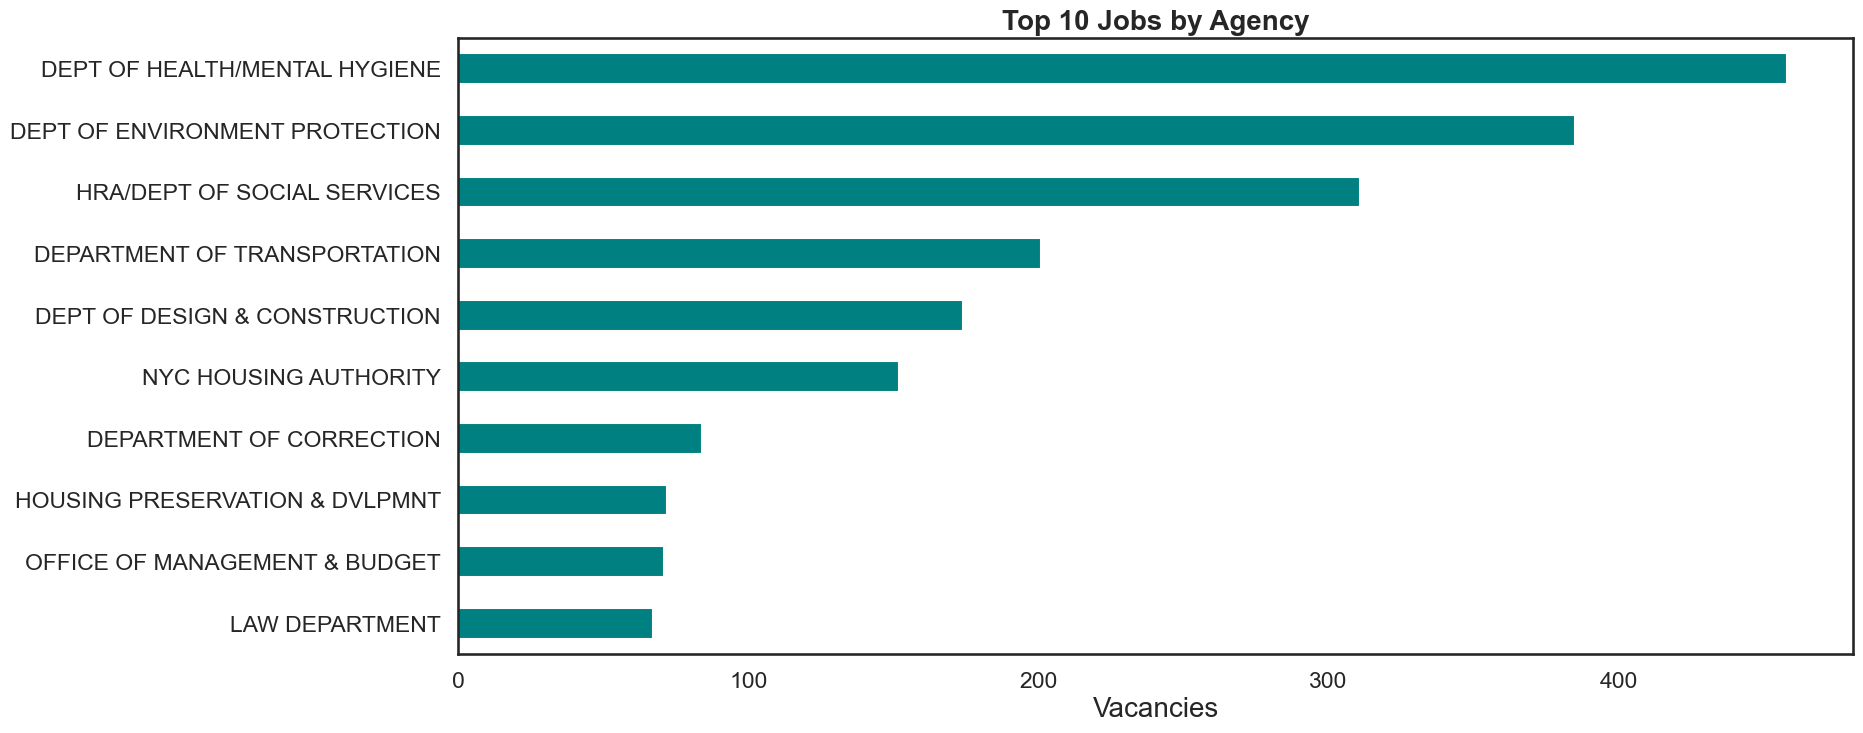

In [25]:
# A bar chart allows us to see how x relates to y
# Number of vacancies relate to agency

agency = ext_ft_a['Agency'].value_counts()[:10]
agency = agency.sort_values(ascending = True)
agency.plot(kind = 'barh', color = 'teal')
plt.title('Top 10 Jobs by Agency', fontsize=20, fontweight='bold')
plt.xlabel('Vacancies', fontsize=20)
#plt.ylabel('Agency', fontsize=17)
plt.show()

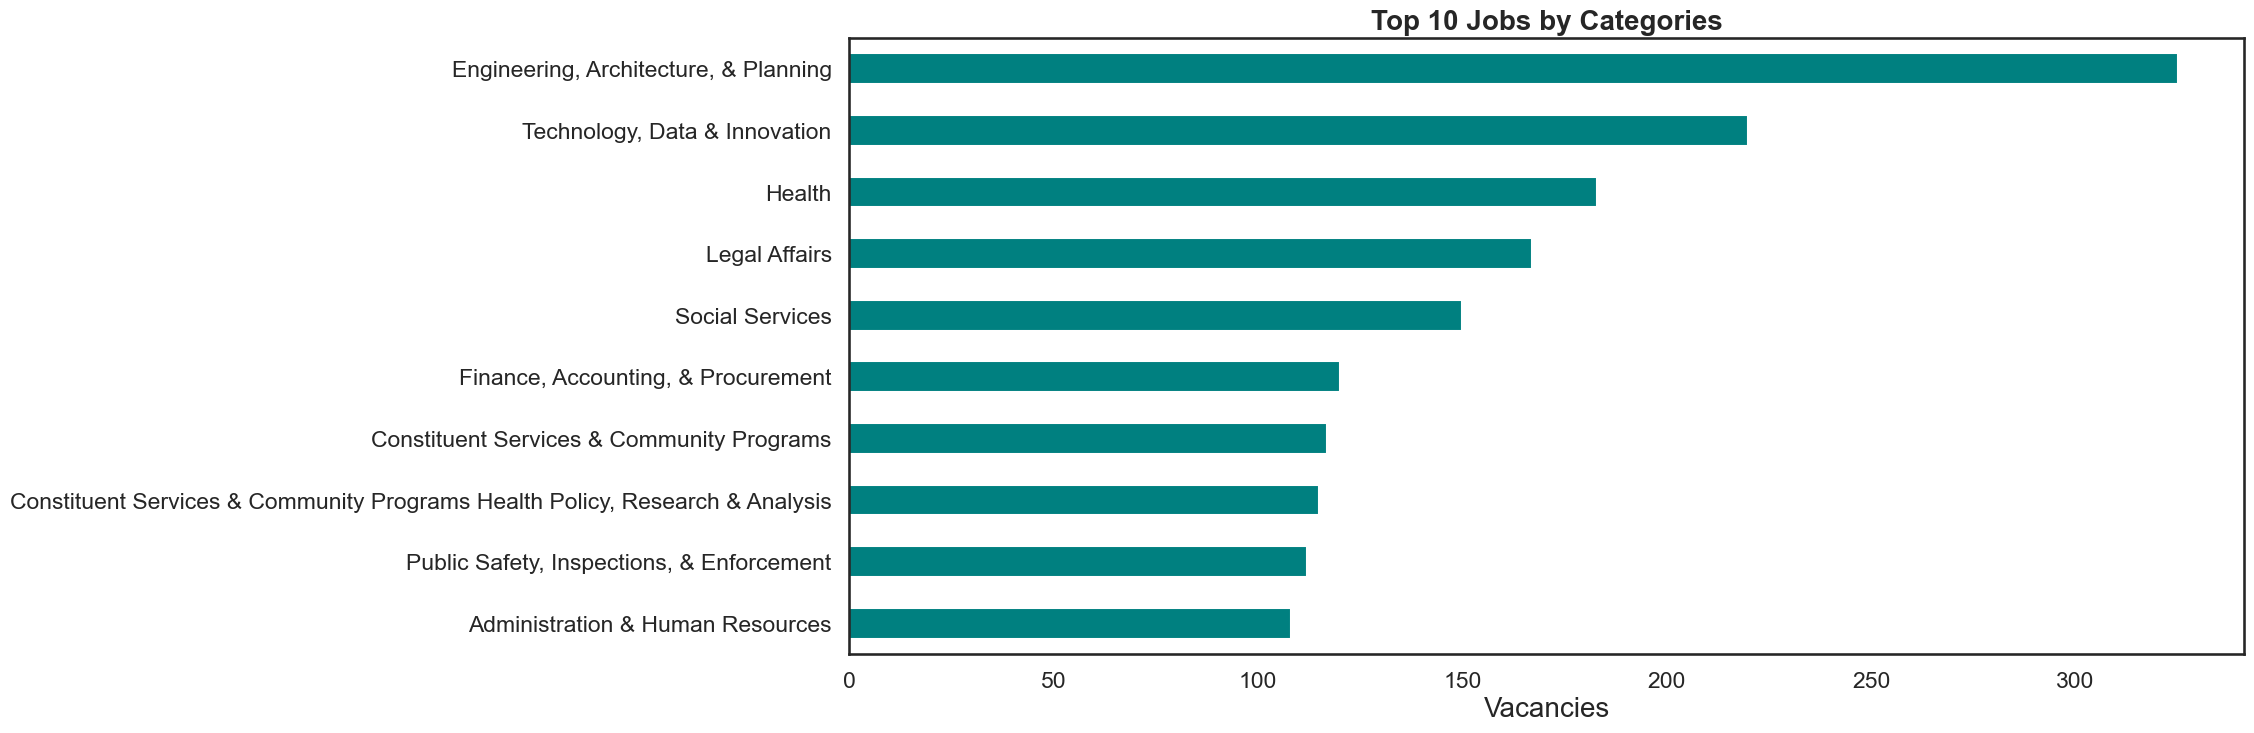

In [26]:
# A bar chart allows us to see how x relates to y
# Number of vacancies relate to job category

category = ext_ft_a['Job Category'].value_counts()[:10]
category = category.sort_values(ascending = True)
category.plot(kind = 'barh', color = 'Teal')
plt.title('Top 10 Jobs by Categories', fontsize=20, fontweight='bold')
plt.xlabel('Vacancies', fontsize=20)
#plt.ylabel('Category', fontsize=17)
plt.show()

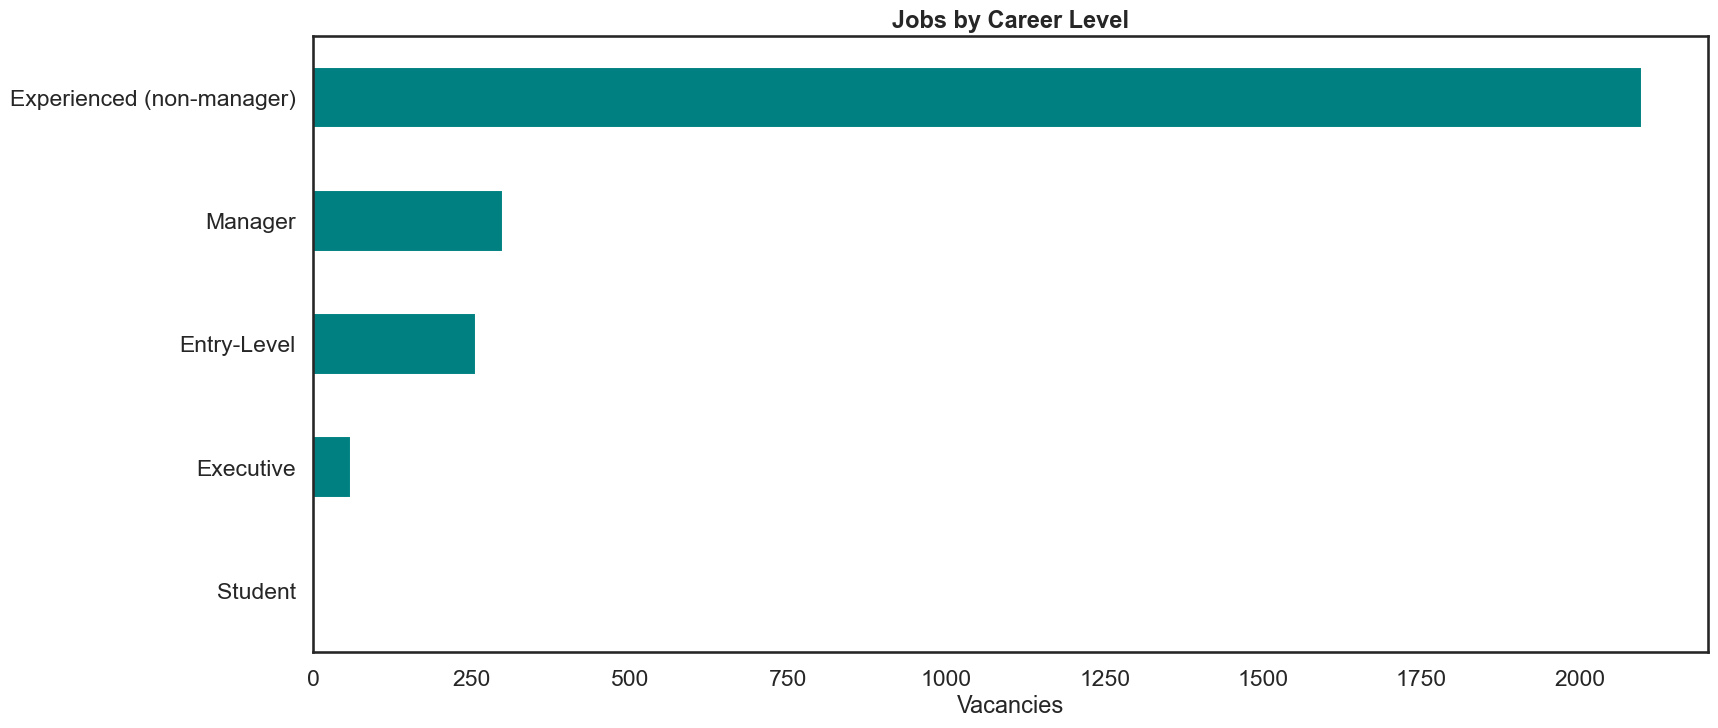

In [27]:
# A bar chart allows us to see how x relates to y
# Nnumber of vacancies relate to career level

level = ext_ft_a['Career Level'].value_counts()
level = level.sort_values(ascending = True)
level.plot(kind = 'barh', color = 'teal')
plt.title('Jobs by Career Level', fontsize = 17, fontweight = 'bold')
plt.xlabel('Vacancies', fontsize=17)
#plt.ylabel('Category', fontsize=17)
plt.show()

#### Average Salary

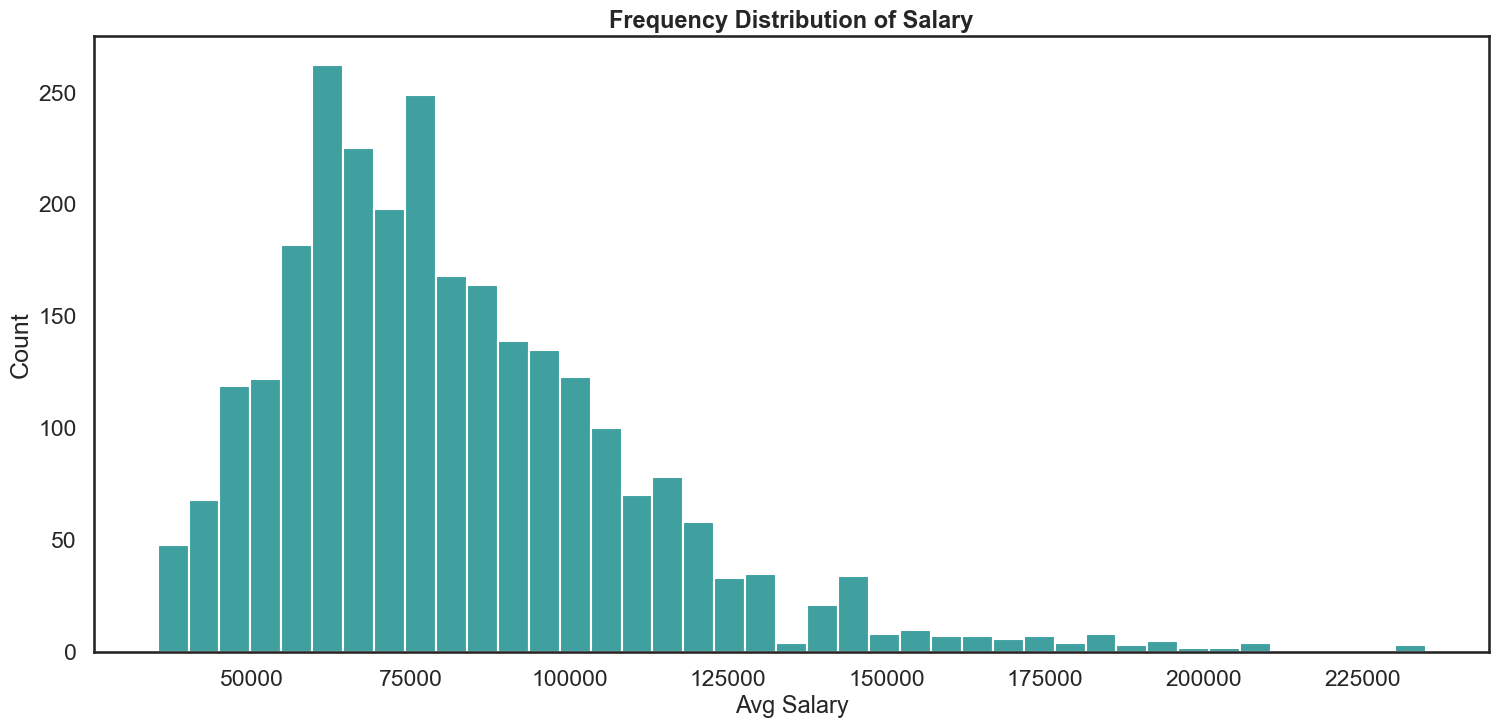

In [28]:
# Lets see the distribution of Avg Salary

sns.histplot(data = ext_ft_a, x= 'Avg Salary', color = 'teal')

plt.title('Frequency Distribution of Salary', fontsize=17, fontweight='bold')
plt.xlabel('Avg Salary', fontsize=17)
plt.show()

In [29]:
# Lets see some summary statistics
mean = ext_ft_a['Avg Salary'].mean() 
median = ext_ft_a['Avg Salary'].median()
sigma = ext_ft_a['Avg Salary'].std()
print (f'Mean = {round(mean,2)}')
print(f'Median = {round(median,2)}')
print(f'Satndard Deviation = {round(sigma,2)}')

Mean = 82028.97
Median = 75907.0
Satndard Deviation = 28747.96


Text(0.5, 1.0, 'Distribution of Salary for All Roles')

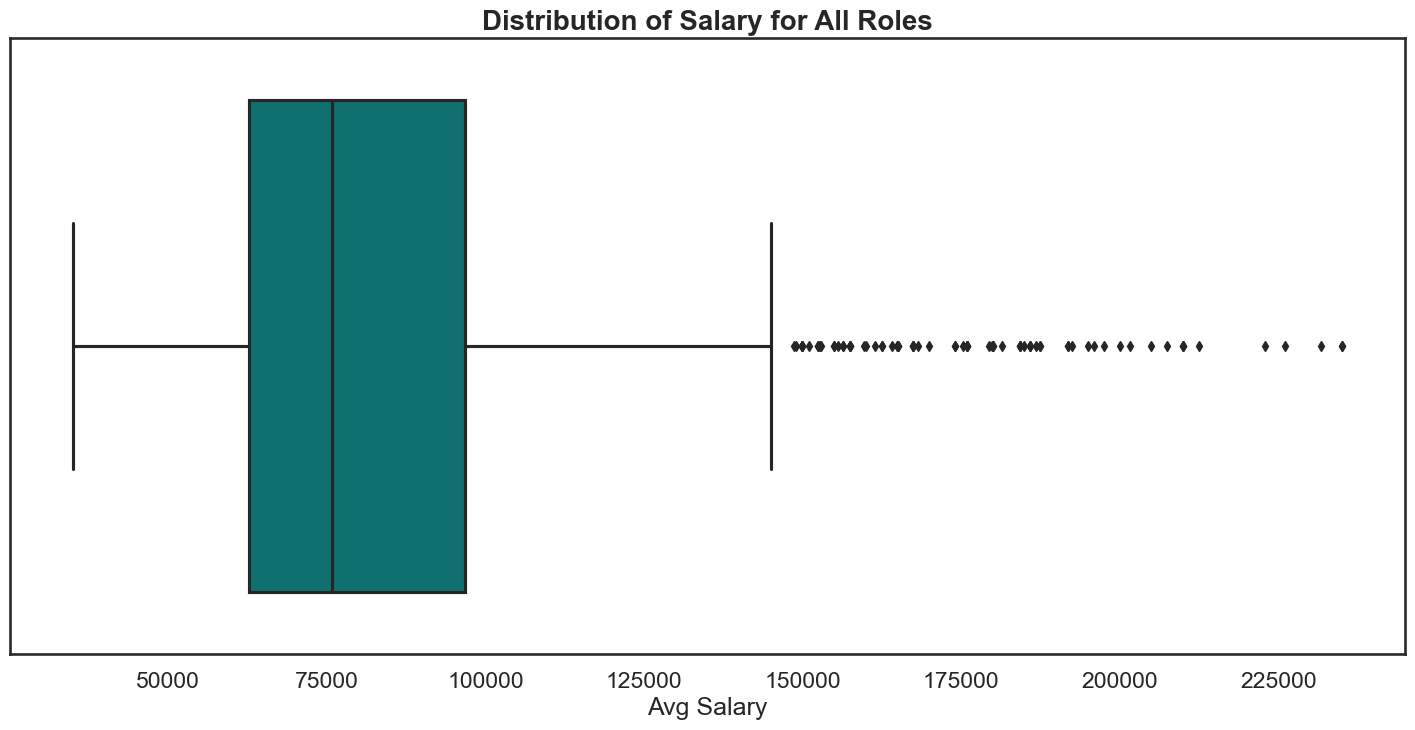

In [30]:
sns.boxplot(data = ext_ft_a, x = 'Avg Salary', color = 'teal' )
plt.title('Distribution of Salary for All Roles', fontsize=20, fontweight='bold' )

### Non Tech Avg Salary 

In [31]:
filters = [
'Technology, Data & Innovation Social Services',
'Technology, Data & Innovation Public Safety, Inspections, & Enforcement', 
'Technology, Data & Innovation Policy, Research & Analysis Social Services',
'Technology, Data & Innovation Policy, Research & Analysis',
'Technology, Data & Innovation Legal Affairs Public Safety, Inspections, & Enforcement', 
'Technology, Data & Innovation Legal Affairs Policy, Research & Analysis Public Safety, Inspections, & Enforcement',
'Technology, Data & Innovation Legal Affairs Policy, Research & Analysis',
'Technology, Data & Innovation Legal Affairs',
'Technology, Data & Innovation']

non_tech = pd.pivot_table(ext_ft_a[~ext_ft_a['Job Category'].isin(filters)], values='Avg Salary', index=['Agency'],  aggfunc='mean')

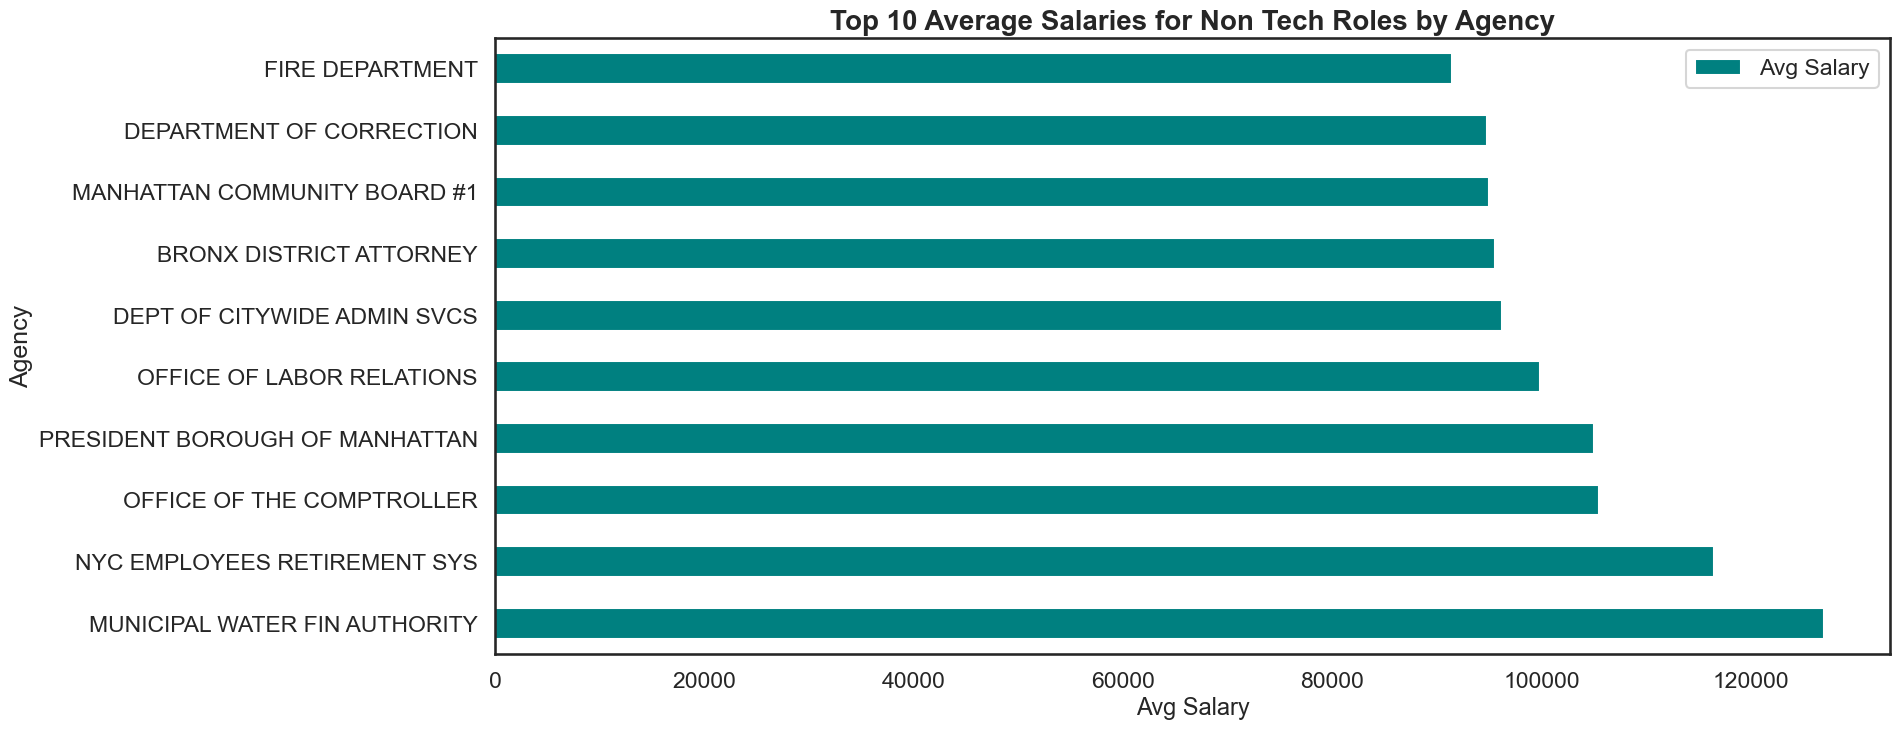

In [32]:
#non_tech = pd.DataFrame(non_tech)
non_tech_sorted = non_tech.sort_values(by = ['Avg Salary'], ascending= False)
non_tech_ss = non_tech_sorted[:10]
non_tech_ss.plot(kind= 'barh', color = 'teal')
plt.title('Top 10 Average Salaries for Non Tech Roles by Agency', fontsize=20, fontweight='bold')
plt.xlabel('Avg Salary', fontsize=17)
# plt.ylabel('Agency', fontsize=17)
plt.show()

In [33]:
# Ran the df in oredr to understand if the above graph was sorted correctly.
non_tech_sorted

,Avg Salary
Agency,
MUNICIPAL WATER FIN AUTHORITY,126957.250000
NYC EMPLOYEES RETIREMENT SYS,116514.600000
OFFICE OF THE COMPTROLLER,105449.543478
PRESIDENT BOROUGH OF MANHATTAN,105000.000000
OFFICE OF LABOR RELATIONS,99880.300000
DEPT OF CITYWIDE ADMIN SVCS,96194.090909
BRONX DISTRICT ATTORNEY,95539.221154
MANHATTAN COMMUNITY BOARD #1,95000.000000
DEPARTMENT OF CORRECTION,94781.020000


In [34]:
non_tech.describe()

,Avg Salary
count,60.000000
mean,79408.873099
std,14790.477683
min,51063.500000
25%,69480.125000
50%,77739.713855
75%,87653.750000
max,126957.250000


### Technology, Data & Innovation

In [35]:
filters = [
'Technology, Data & Innovation Social Services',
'Technology, Data & Innovation Public Safety, Inspections, & Enforcement', 
'Technology, Data & Innovation Policy, Research & Analysis Social Services',
'Technology, Data & Innovation Policy, Research & Analysis',
'Technology, Data & Innovation Legal Affairs Public Safety, Inspections, & Enforcement', 
'Technology, Data & Innovation Legal Affairs Policy, Research & Analysis Public Safety, Inspections, & Enforcement',
'Technology, Data & Innovation Legal Affairs Policy, Research & Analysis',
'Technology, Data & Innovation Legal Affairs',
'Technology, Data & Innovation']

tech = pd.pivot_table(ext_ft_a[ext_ft_a['Job Category'].isin(filters)], values='Avg Salary', index=['Agency'],  aggfunc='mean')

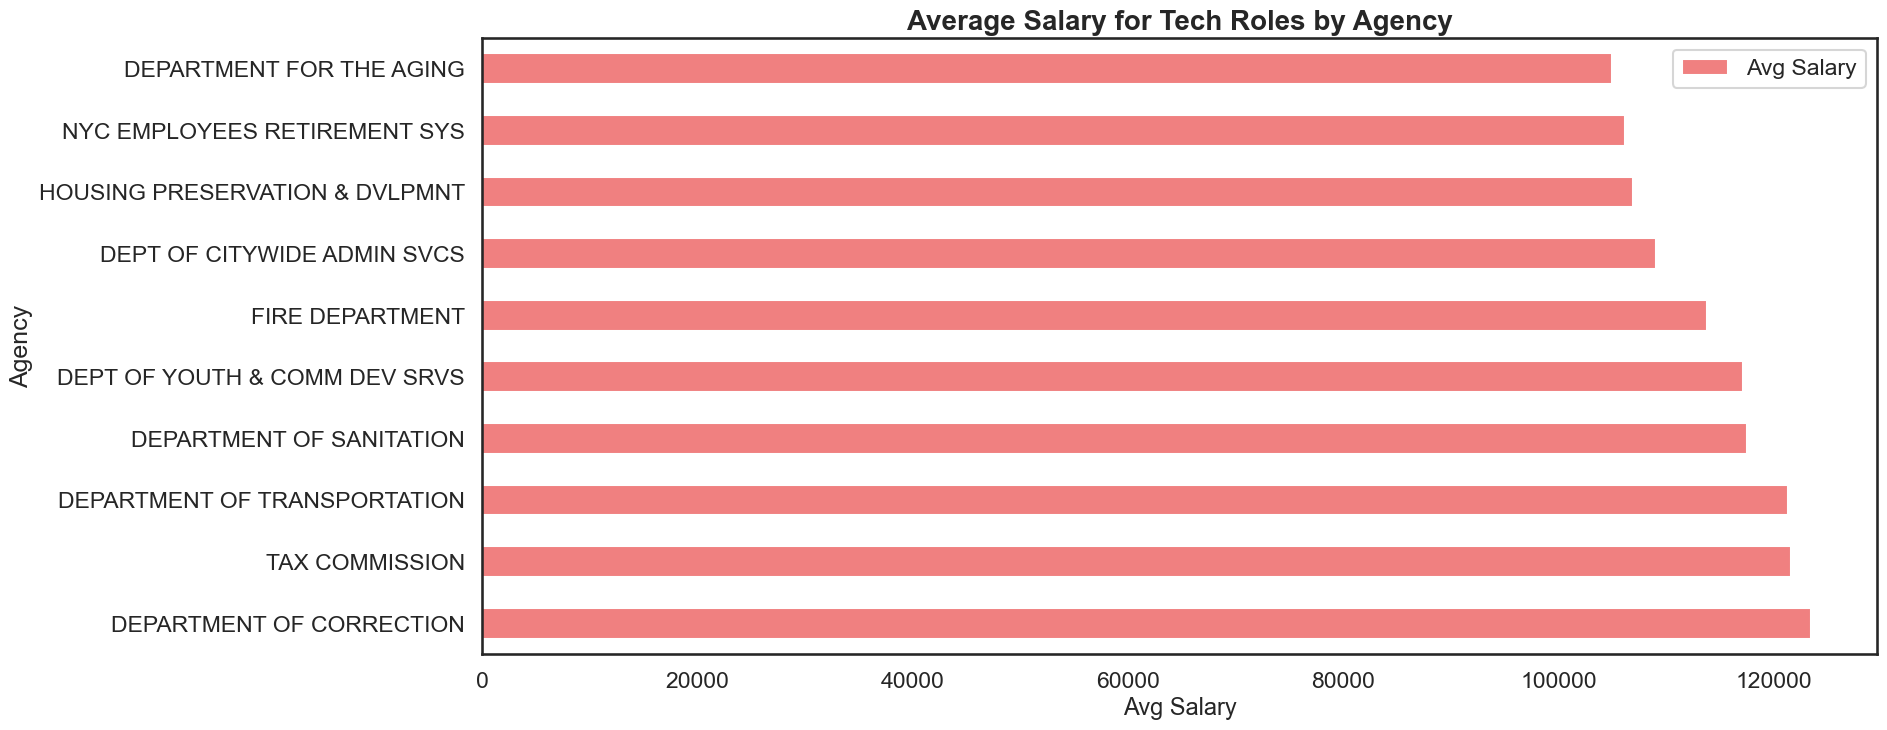

In [36]:
#tech = pd.DataFrame(tech)                         
tech_sorted = tech.sort_values(by = ['Avg Salary'], ascending = False)
tech_ss = tech_sorted[:10]
tech_ss.plot(kind= 'barh', color = '#F08080')
plt.title('Average Salary for Tech Roles by Agency', fontsize=20, fontweight='bold')
plt.xlabel('Avg Salary', fontsize=17)
plt.show()

In [37]:
# Ran the df in order to understand if the above graph was sorted correctly.
tech_sorted

,Avg Salary
Agency,
DEPARTMENT OF CORRECTION,123449.944444
TAX COMMISSION,121601.500000
DEPARTMENT OF TRANSPORTATION,121309.166667
DEPARTMENT OF SANITATION,117500.000000
DEPT OF YOUTH & COMM DEV SRVS,117119.666667
FIRE DEPARTMENT,113856.777778
DEPT OF CITYWIDE ADMIN SVCS,109105.250000
HOUSING PRESERVATION & DVLPMNT,106912.222222
NYC EMPLOYEES RETIREMENT SYS,106228.916667


Text(0.5, 1.0, ' Distribution of Average Salary for Tech Roles')

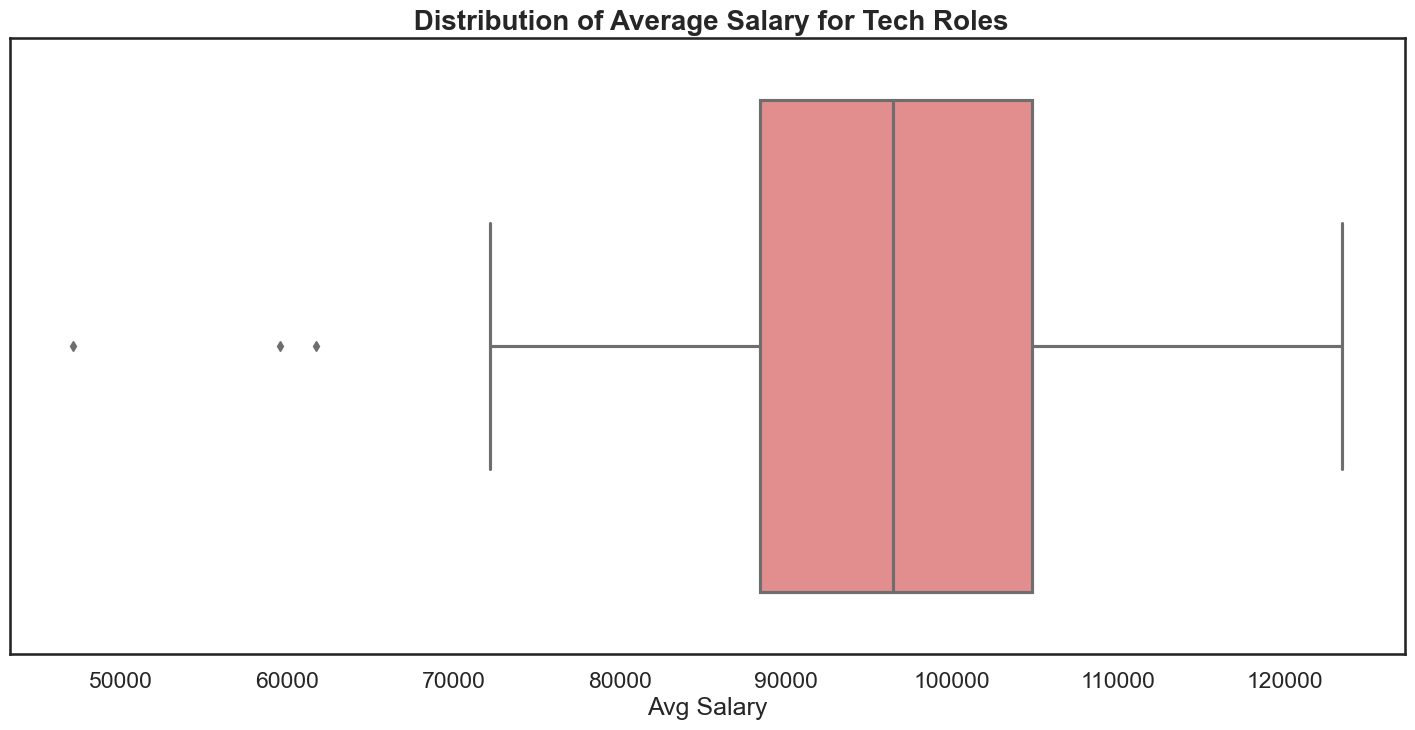

In [38]:
sns.boxplot(data = tech, x = 'Avg Salary', color = '#F08080')
plt.title(' Distribution of Average Salary for Tech Roles', fontsize=20, fontweight='bold')

In [39]:
tech.describe()

,Avg Salary
count,38.000000
mean,95410.953602
std,17037.385257
min,47126.500000
25%,88444.375000
50%,96445.960317
75%,104807.050000
max,123449.944444


### Analyst

In [40]:
analyst = pd.pivot_table(ext_ft_a[ext_ft_a['Business Title'].str.contains('Data Analyst|Business Analyst|BUSINESS ANALYST')], values = 'Avg Salary', index=['Agency'], aggfunc='mean')

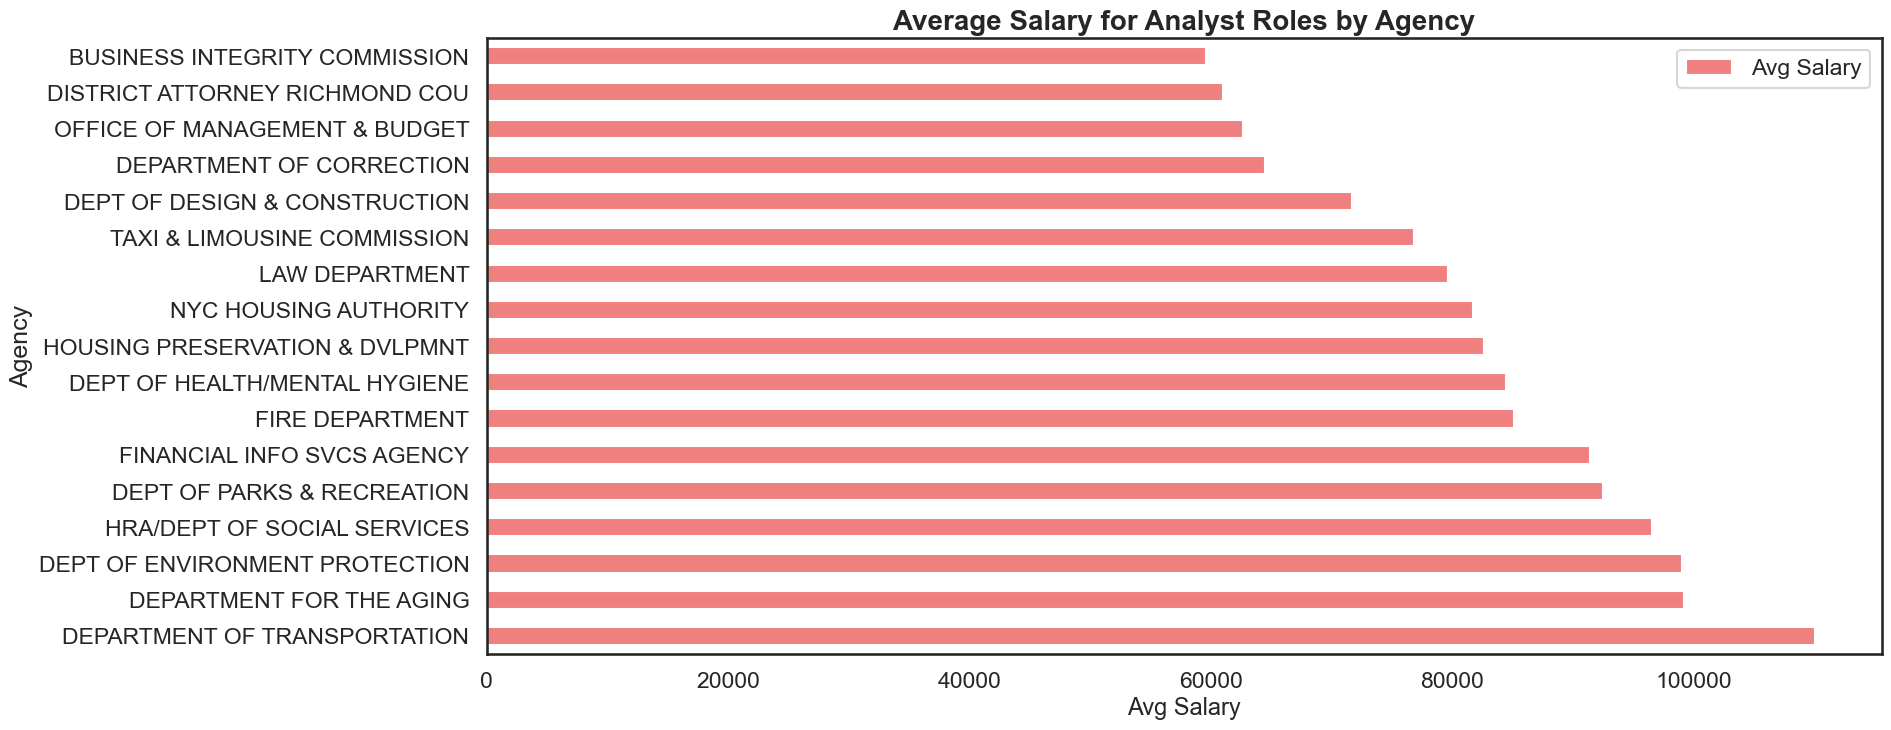

In [41]:
#analyst = pd.DataFrame(analyst)                         
analyst_sorted = analyst.sort_values(by = ['Avg Salary'], ascending = False)
analyst_ss = analyst_sorted[:]
analyst_ss.plot(kind= 'barh', color = '#F08080')
plt.title('Average Salary for Analyst Roles by Agency', fontsize=20, fontweight='bold')
plt.xlabel('Avg Salary', fontsize=17)
plt.show()

Text(0.5, 1.0, ' Distribution of Average Salary for Analyst Roles')

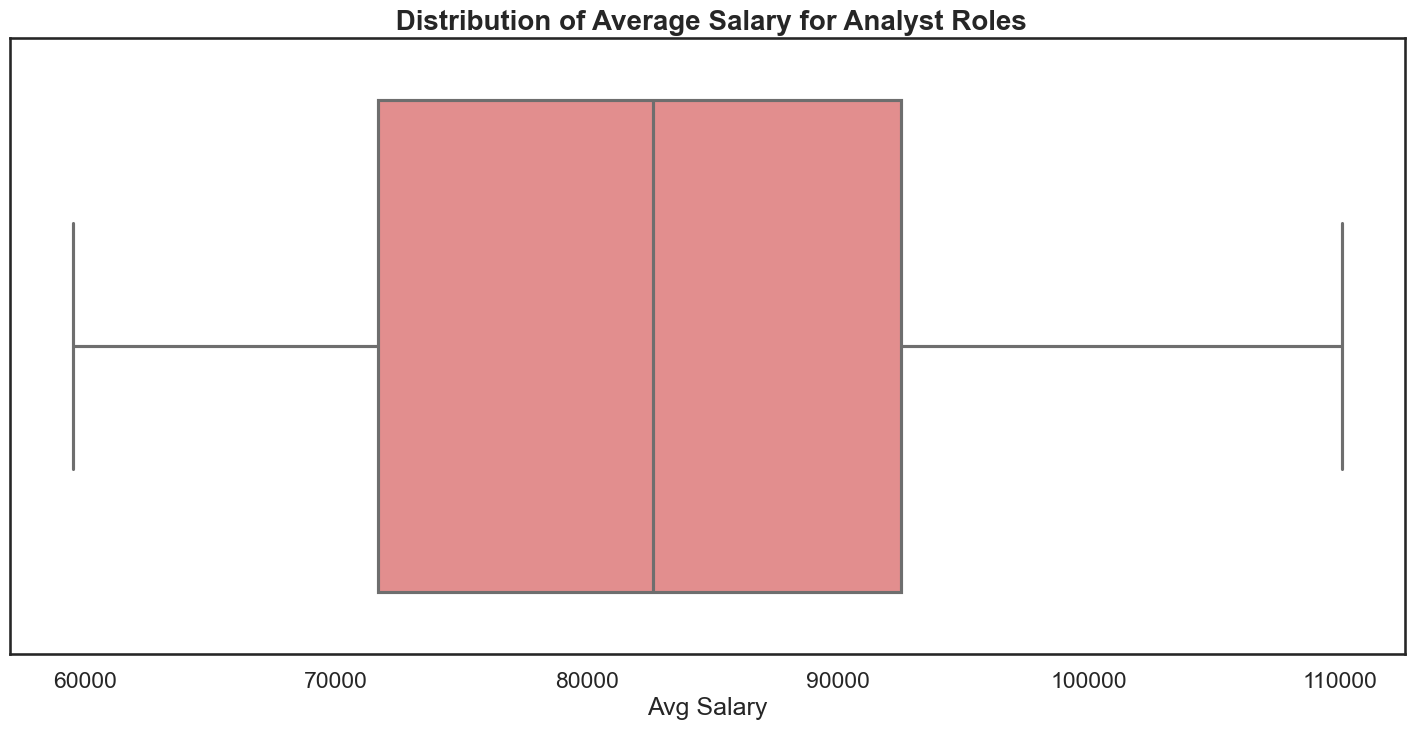

In [42]:
sns.boxplot(data = analyst, x = 'Avg Salary', color = '#F08080' )
plt.title(' Distribution of Average Salary for Analyst Roles', fontsize=20, fontweight='bold')

In [43]:
analyst.describe()

,Avg Salary
count,17.000000
mean,82260.808824
std,14915.592645
min,59550.000000
25%,71696.666667
50%,82642.250000
75%,92500.000000
max,110065.250000


### Distribution of Tech vs Analyst Salaries

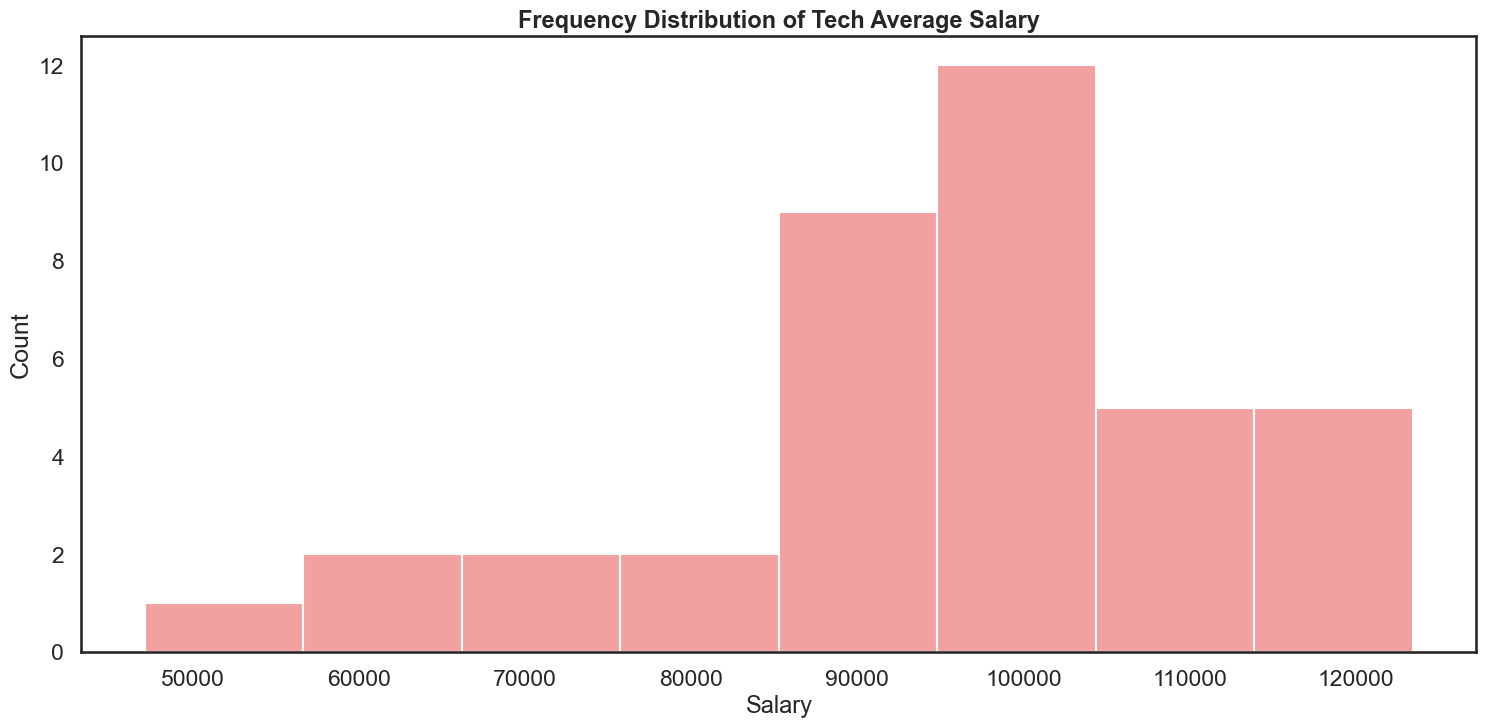

In [44]:
# Lets see the distribution of Tech salaries
sns.histplot(data = tech, x= 'Avg Salary', color = '#F08080')

plt.title('Frequency Distribution of Tech Average Salary', fontsize=17, fontweight='bold')
plt.xlabel('Salary', fontsize=17)
plt.show()

In [45]:
mean = tech['Avg Salary'].mean()
median = tech['Avg Salary'].median()
sigma = tech['Avg Salary'].std()
print (f'Mean = {round(mean,2)}')
print(f'Median = {round(median,2)}')
print(f'Satndard Deviation = {round(sigma,2)}')

Mean = 95410.95
Median = 96445.96
Satndard Deviation = 17037.39


In [46]:
#Test the distribution of avg salary for normality

stat, p = shapiro(tech['Avg Salary'])
print('Statistic = %.3f \np = %.3f' % (stat, p))

# Compare the p value to the significance threshold alpha. 

alpha = 0.05

if p > alpha:
    print("This looks normal (fail to reject H0)")
else:
    print("This is not normal (reject H0)")

Statistic = 0.948 
p = 0.074
This looks normal (fail to reject H0)


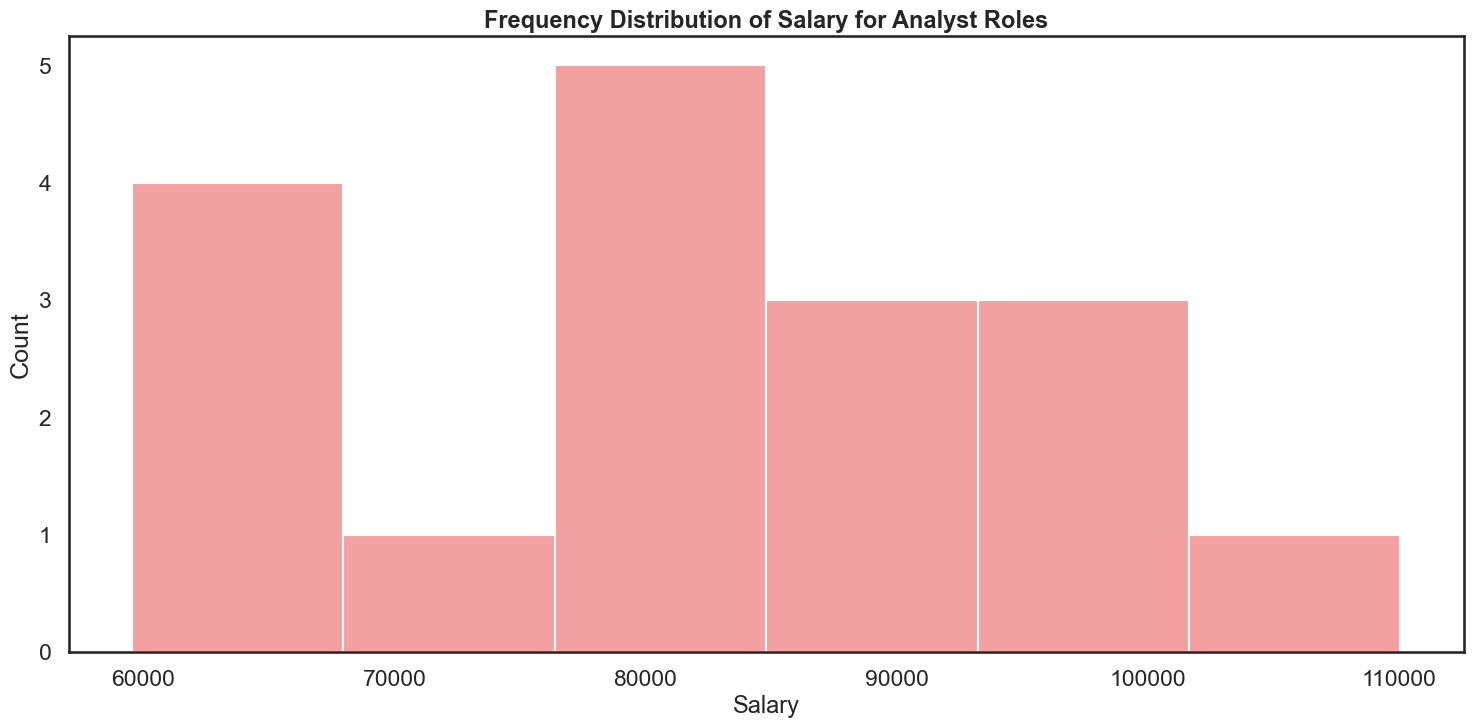

In [47]:
# Lets see the distribution of Analyst salaries
sns.histplot(data = analyst, x= 'Avg Salary', color = '#F08080')

plt.title('Frequency Distribution of Salary for Analyst Roles', fontsize=17, fontweight='bold')
plt.xlabel('Salary', fontsize=17)
plt.show()

In [48]:
mean = analyst['Avg Salary'].mean()
median = analyst['Avg Salary'].median()
sigma = analyst['Avg Salary'].std()
print (f'Mean = {round(mean,2)}')
print(f'Median = {round(median,2)}')
print(f'Satndard Deviation = {round(sigma,2)}')

Mean = 82260.81
Median = 82642.25
Satndard Deviation = 14915.59


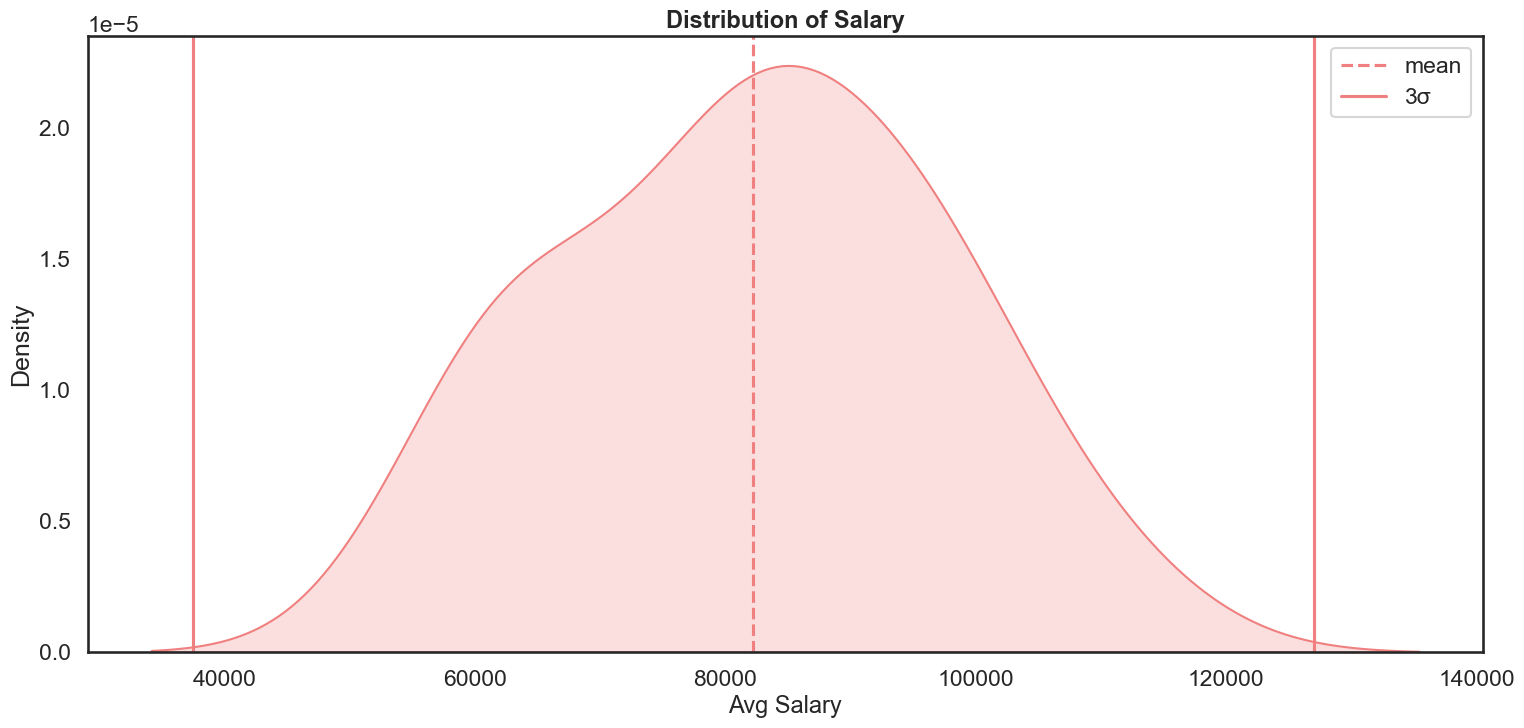

In [49]:
sns.kdeplot(data = analyst, x= 'Avg Salary', color='#F08080', shade=True)
plt.title('Distribution of Salary', fontsize=17, fontweight='bold')
plt.xlabel('Avg Salary', fontsize=17)
plt.axvline(mean, color='#F08080', label='mean', linestyle='--')
plt.axvline(mean+3*sigma, color='#F08080', label='3σ')
plt.axvline(mean-3*sigma, color='#F08080')
plt.legend()
plt.show()

In [50]:
#Test the distribution of avg salary for normality

stat, p = shapiro(analyst['Avg Salary'])
print('Statistic = %.3f \np = %.3f' % (stat, p))

# Compare the p value to the significance threshold alpha. 

alpha = 0.05

if p > alpha:
    print("This looks normal (fail to reject H0)")
else:
    print("This is not normal (reject H0)")

Statistic = 0.960 
p = 0.636
This looks normal (fail to reject H0)


##### Results:

A Shapiro-Wilk test was performed and did not show evidence of non-normality (W = 0.953, p-value = 0.145). Based on this outcome, we can further conduct probability testing.


In [51]:
x=75000
cdf = ss.norm.cdf(x, tech['Avg Salary'].mean(), tech['Avg Salary'].std())
cdf

0.1154566112169727